In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
from torchwi import Tomo2d
from torchwi.io import rsf

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]='4'

In [4]:
fshot="../data_marm/shot.rsf"
fvel="../data_marm/marm.rsf"

ny,nx,h,vel = rsf.fromfile(fvel,"n1 n2 d1 data")
nshot,sxy = rsf.fromfile(fshot,"n2 data")

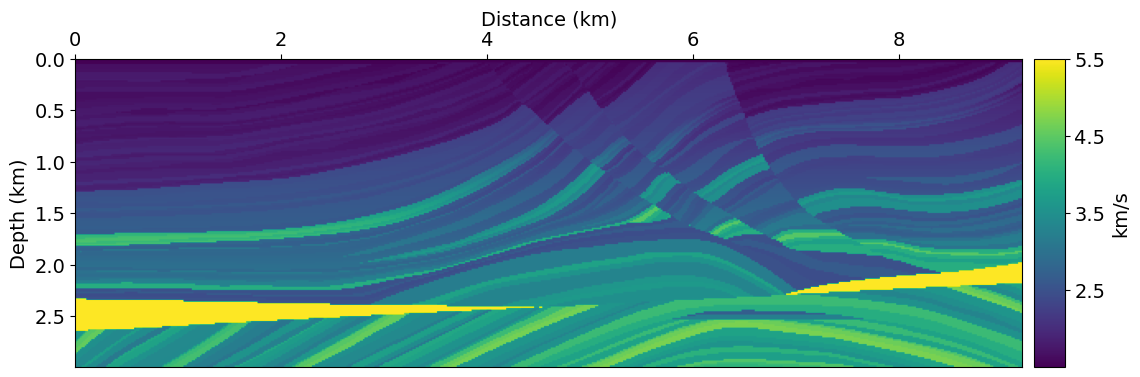

In [5]:
from torchwi.utils.plot import plot_vel
plot_vel(vel,h)

In [6]:
DEVICE='cuda'

vp=torch.from_numpy(vel).to(DEVICE)
sxy=torch.from_numpy(sxy).to(DEVICE)

sxs = sxy[:,0]
sy = sxy[0,1]
ry = sy

In [7]:
tomo = Tomo2d(nx,ny,h,device=DEVICE)

alpha = 2*np.pi/(20.*h)*vel.mean()
freq = 0.05
omega = 2*np.pi*freq - alpha * 1.0j

In [8]:
tomo.factorize(omega, vp)

In [9]:
ttime = tomo.forward(vp, sxs, sy, ry)

In [10]:
t = ttime.detach().cpu().numpy()
t.tofile("ttime.bin")

Text(0, 0.5, 'Time (s)')

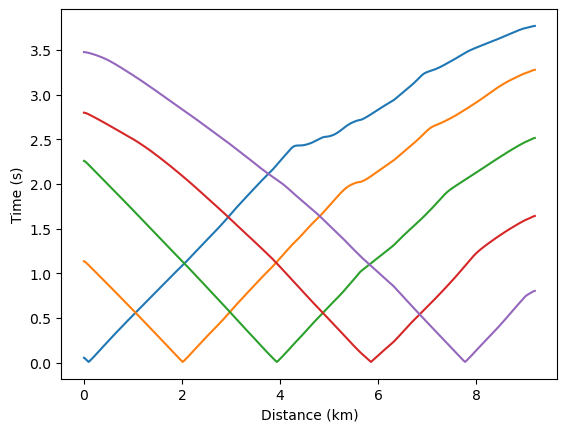

In [11]:
ax = np.arange(nx)*h
for ishot in range(0,nshot,20):
    plt.plot(ax,t[ishot,:],'k-')
plt.xlabel('Distance (km)')
plt.ylabel('Time (s)')